In [29]:
import pandas as pd
import numpy as np

train_sample = pd.read_csv('train_sample.csv')
X = train_sample['id']
y = train_sample['landmark_id']

In [30]:
train_sample.head()


,id,url,landmark_id
0,b19a8e2a9f0459f9,https://upload.wikimedia.org/wikipedia/commons...,15427
1,8f874e2cb73af059,https://upload.wikimedia.org/wikipedia/commons...,47133
2,db0a6d8260b5ffaf,https://upload.wikimedia.org/wikipedia/commons...,1924
3,ce777bb778304709,http://upload.wikimedia.org/wikipedia/commons/...,46705
4,e6bc5d0d33e8cdef,https://upload.wikimedia.org/wikipedia/commons...,121873


In [31]:
len(train_sample)

2557

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)

for train_id, test_id in sss.split(X, y):
    X_train, X_tmp = X.iloc[train_id], X.iloc[test_id]
    y_train, y_tmp = y.iloc[train_id], y.iloc[test_id]

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=10)

for train_id, test_id in sss1.split(X_tmp, y_tmp):
    X_valid, X_test = X_tmp.iloc[train_id], X_tmp.iloc[test_id]
    y_valid, y_test = y_tmp.iloc[train_id], y_tmp.iloc[test_id]

In [33]:
print(X_train[:5])
print(y_train[:5])

494     837bf55999a381ed
1525    f61fc2f7c18ff96c
192     5eb98887004e564b
655     4ec916eb92a77db8
1636    42ab9bcc73f8a9de
Name: id, dtype: object
494     139894
1525    190931
192     177870
655     165596
1636    138982
Name: landmark_id, dtype: int64


In [34]:
print(X_tmp[:5])
print(y_tmp[:5])

1006    b9828ebe319013de
344     7cfc8a3c937472c9
2291    3a1d7db1cbcaba0d
1360    542f50aae805a80d
1731    608d817eacf1190b
Name: id, dtype: object
1006     40088
344     180759
2291     62798
1360     41808
1731     51856
Name: landmark_id, dtype: int64


In [35]:
print(X_test[:5])
print(y_test[:5])

1856    687dec3ecb6fc0b0
42      4bf42551fbe28638
1224    c8d6b7d333537d37
1671    e75ed27ec7f99e4d
97      430fde3f6a1f8e63
Name: id, dtype: object
1856    160944
42       62074
1224     62798
1671    173511
97       56827
Name: landmark_id, dtype: int64


In [36]:
print(X_valid[:5])
print(y_valid[:5])

96      1f2dca0b2c57e69e
1545    a13bef4b1e92b5f1
1413    6319422d8d627366
1158    3e09dc4f1a2d9b2f
2498    d996a5e28f48ec5b
Name: id, dtype: object
96      14915
1545    41808
1413    51856
1158    25847
2498    38482
Name: landmark_id, dtype: int64


In [37]:
print("Train set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Train set size: 2045
Validation set size: 256
Test set size: 256


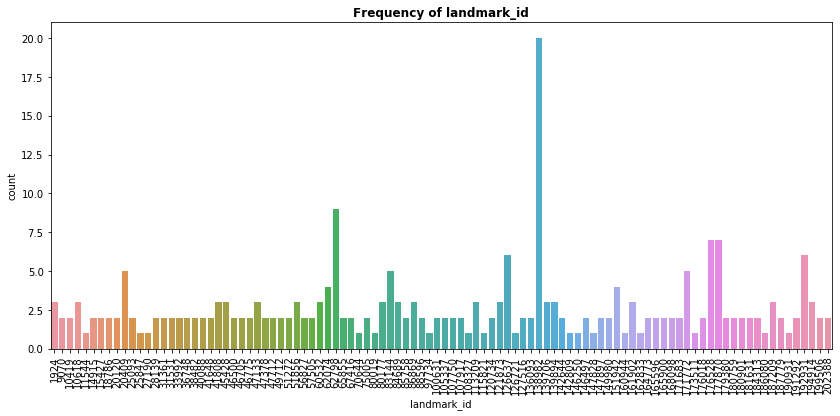

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize = (14, 6))
g = sns.countplot(x=y_test)
g.set_title("Frequency of landmark_id", fontweight="bold", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [39]:
import os, shutil

from_path = "./train_images/"
moveto_path = "./valid_images/"

for f in X_valid.iloc[:] :
    src = from_path+f+'.jpg'
    dst = moveto_path+f+'.jpg'

    if os.path.exists(src):
        shutil.move(src, dst)

In [40]:
moveto_path = "./test_images/"

for f in X_test.iloc[:]:
    src = from_path+f+'.jpg'
    dst = moveto_path+f+'.jpg'
    if os.path.exists(src):
        shutil.move(src, dst)